<a href="https://colab.research.google.com/github/chrisdionisius/MachineLearning2022/blob/main/Jobsheet02_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727008
Nama: Dionisius Damarta Yapenrui
Kelas: TI-4J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

In [80]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [81]:
# import package
import numpy as np
import pandas as pd

In [82]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv')
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
1,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762
2,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818
3,Knives Out,2019,UA,130,"Comedy, Crime, Drama",7.9,A detective investigates the death of a patria...,82.0,Rian Johnson,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,454203,165359751
4,The Irishman,2019,R,209,"Biography, Crime, Drama",7.9,An old man recalls his time painting houses fo...,94.0,Martin Scorsese,Robert De Niro,Al Pacino,Joe Pesci,Harvey Keitel,324720,7000000


In [83]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   829 non-null    object 
 1   Released_Year  829 non-null    int64  
 2   Certificate    784 non-null    object 
 3   Runtime        829 non-null    int64  
 4   Genre          829 non-null    object 
 5   IMDB_Rating    829 non-null    float64
 6   Overview       829 non-null    object 
 7   Meta_score     749 non-null    float64
 8   Director       829 non-null    object 
 9   Star1          829 non-null    object 
 10  Star2          829 non-null    object 
 11  Star3          829 non-null    object 
 12  Star4          829 non-null    object 
 13  No_of_Votes    829 non-null    int64  
 14  Gross          829 non-null    int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 97.3+ KB


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,829.000000,829.000000,829.000000,749.000000,8.290000e+02,8.290000e+02
mean,1993.958987,124.086852,7.947648,77.460614,3.156479e+05,6.797970e+07
std,21.127649,27.517402,0.283158,12.502304,3.439137e+05,1.098014e+08
min,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,3.600000e+01
25%,1984.000000,104.000000,7.700000,70.000000,7.148100e+04,3.270000e+06
50%,2000.000000,120.000000,7.900000,78.000000,1.867340e+05,2.353089e+07
75%,2010.000000,138.000000,8.100000,86.000000,4.473680e+05,8.050000e+07
max,2019.000000,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### Visualisasi Data

In [84]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


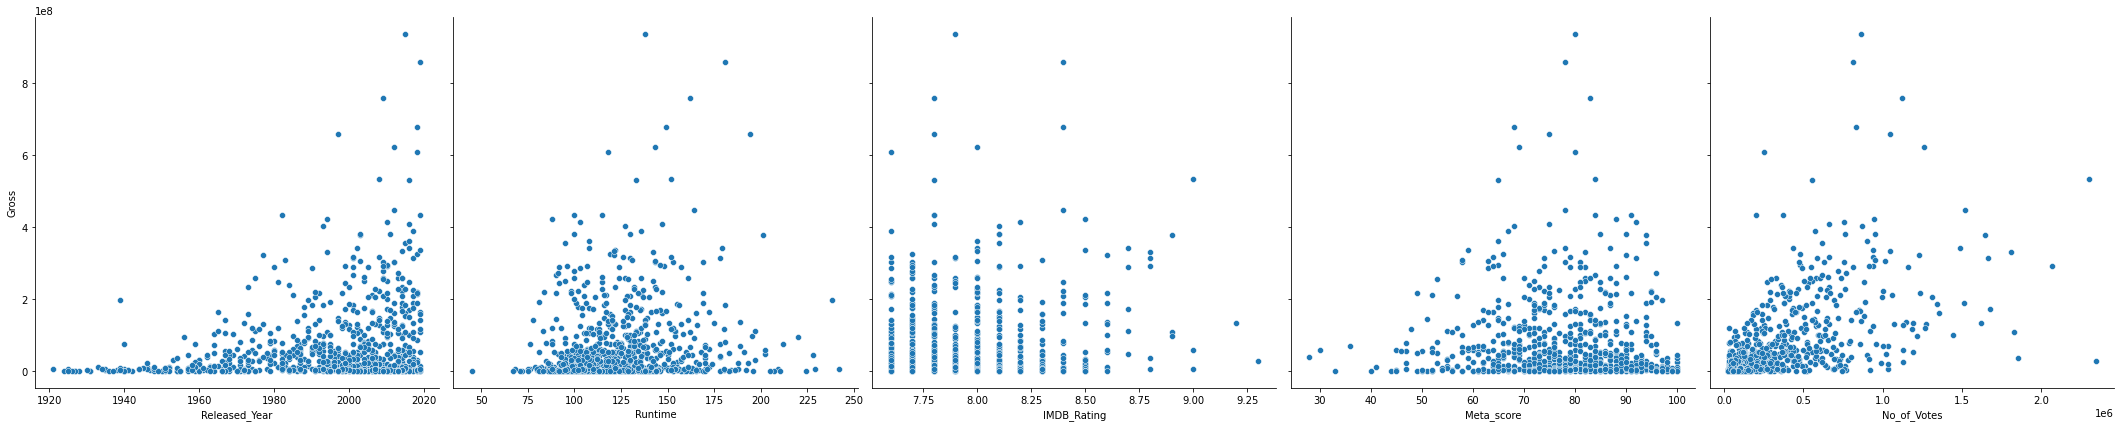

In [85]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes'], 
             y_vars='Gross', size=6, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

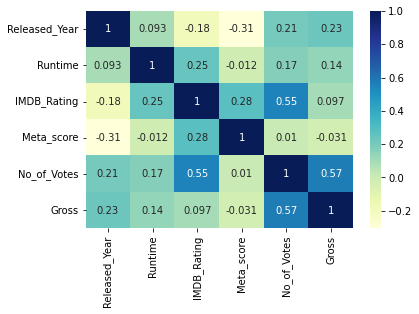

In [86]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa No. of Votes memiliki korelasi yang paling kuat terhadap Gross

### Regresi Linier

In [106]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['No_of_Votes']
y = data['Gross']

In [107]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [108]:
# hasil training dtaset
X_train
y_train

310     56116183
248    304360277
44     121661683
675     95860116
423       697181
         ...    
53      26400640
350        26331
79      30000000
792      3333969
520     36764313
Name: Gross, Length: 580, dtype: int64

In [109]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const          8.856708e+06
No_of_Votes    1.902622e+02
dtype: float64

In [111]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gross   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     295.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           8.15e-54
Time:                        09:15:05   Log-Likelihood:                -11467.
No. Observations:                 580   AIC:                         2.294e+04
Df Residuals:                     578   BIC:                         2.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.857e+06   5.26e+06      1.683      0.093   -1.48e+06    1.92e+07
No_of_Votes   190.2622     11.066     17.193      0.000     168.528     211.997
==============================================================================
Omnibus:                      426.210   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9948.061
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      22.407   Cond. No.                     6.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

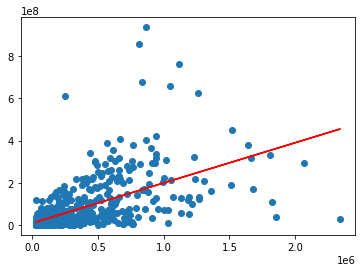

In [93]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, (8.856708e+06) + (1.902622e+02)*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [94]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


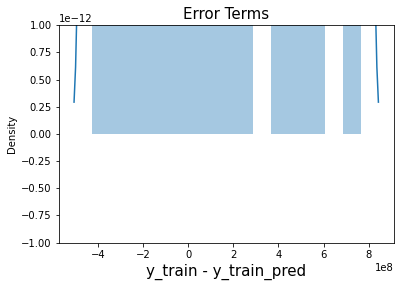

In [95]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

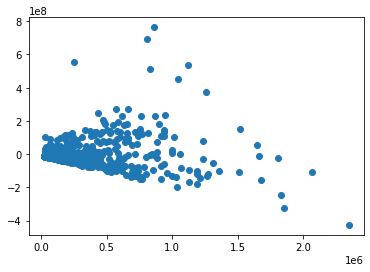

In [96]:
plt.scatter(X_train,res)
plt.show()

In [97]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


711    1.777335e+07
706    6.404682e+07
774    1.992845e+07
19     9.754439e+07
623    7.954634e+07
dtype: float64

In [98]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.2992685713540182

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

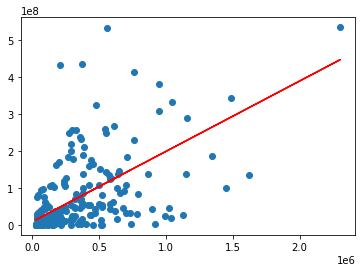

In [99]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()